In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("D:\\DATA_science\\Data_sets\\claimants.csv")

In [10]:
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [11]:
data.drop(["CASENUM"],inplace=True,axis=1)

In [12]:
data.shape

(1340, 6)

In [13]:
data=data.dropna()
data.shape

(1096, 6)

In [14]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [15]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [17]:
y_pred=classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [18]:
y_pred_df= pd.DataFrame({'actual_Y': Y,
                         'predicted_Y': classifier.predict(X)})

In [19]:
y_pred_df.head()

,actual_Y,predicted_Y
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(Y,y_pred)
print(confusion_matrics)

[[381 197]
 [123 395]]


In [20]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



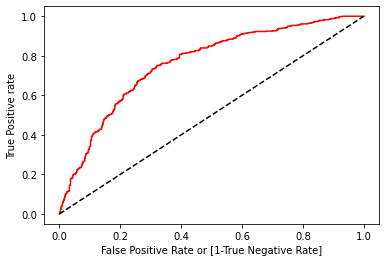

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive rate')
plt.show()

In [27]:
auc

0.7108589063606365